In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.data", 
                 sep=r"\s+")

In [6]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null float64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [12]:
np.unique(df["year"])

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

# Visualization for a single continuous variable

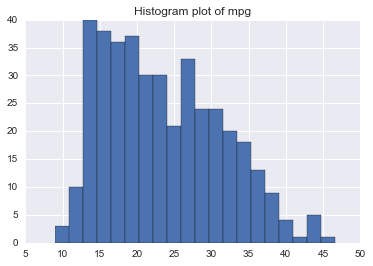

In [24]:
plt.hist(df["mpg"], bins = 20)
plt.title("Histogram plot of mpg")

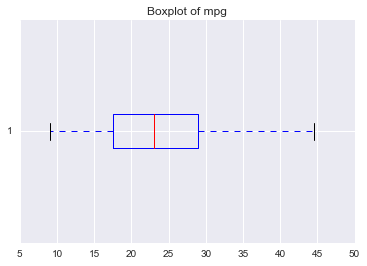

In [27]:
plt.boxplot(df["mpg"], vert=False)
plt.title("Boxplot of mpg")

In [22]:
df.query("mpg < 40 and mpg > 35").shape[0]

25

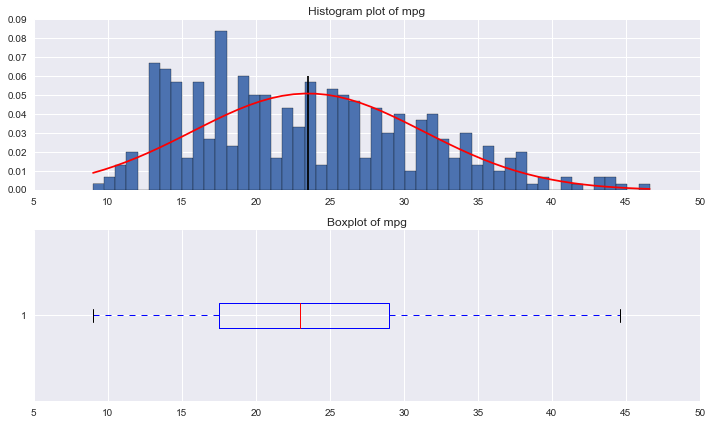

In [49]:
plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
n, bins, patches = plt.hist(df["mpg"], bins = 50, normed = True)
plt.title("Histogram plot of mpg")

pdf = normpdf(bins, df["mpg"].mean(), df["mpg"].std())
plt.plot(bins, pdf, ls = "-", color = "red")

plt.vlines([df["mpg"].mean()], ymin=0, ymax=0.06)

plt.subplot(2, 1, 2)
plt.boxplot(df["mpg"], vert=False)
plt.title("Boxplot of mpg")
plt.tight_layout()

In [31]:
from matplotlib.mlab import normpdf

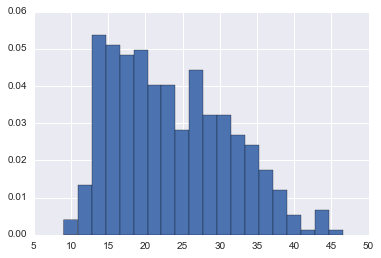

In [35]:
n, bins, patches = plt.hist(df["mpg"], bins = 20, normed = True)

In [36]:
bins

array([  9.  ,  10.88,  12.76,  14.64,  16.52,  18.4 ,  20.28,  22.16,
        24.04,  25.92,  27.8 ,  29.68,  31.56,  33.44,  35.32,  37.2 ,
        39.08,  40.96,  42.84,  44.72,  46.6 ])

In [41]:
normpdf(bins, df["mpg"].mean(), df["mpg"].std())

array([ 0.00912588,  0.01384406,  0.01982389,  0.02679481,  0.03418606,
        0.04117028,  0.046801  ,  0.0502184 ,  0.0508636 ,  0.04862815,
        0.04388387,  0.03738166,  0.03005722,  0.02281263,  0.01634325,
        0.01105193,  0.00705463,  0.00425056,  0.00241744,  0.00129778,
        0.00065763])

In [51]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
14,24.0,4,113.0,95.00,2372.0,15.0,70,3,toyota corona mark ii
39,14.0,8,400.0,175.0,4464.0,11.5,71,1,pontiac catalina brougham
74,13.0,8,302.0,140.0,4294.0,16.0,72,1,ford gran torino (sw)
155,15.0,6,250.0,72.00,3158.0,19.5,75,1,ford maverick
200,18.0,6,250.0,78.00,3574.0,21.0,76,1,ford granada ghia
341,23.5,6,173.0,110.0,2725.0,12.6,81,1,chevrolet citation
250,19.4,8,318.0,140.0,3735.0,13.2,78,1,dodge diplomat
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
138,14.0,8,318.0,150.0,4457.0,13.5,74,1,dodge coronet custom (sw)
345,35.1,4,81.0,60.00,1760.0,16.1,81,3,honda civic 1300


# Visualization for single categorical variable

In [58]:
counts = df["year"].value_counts()

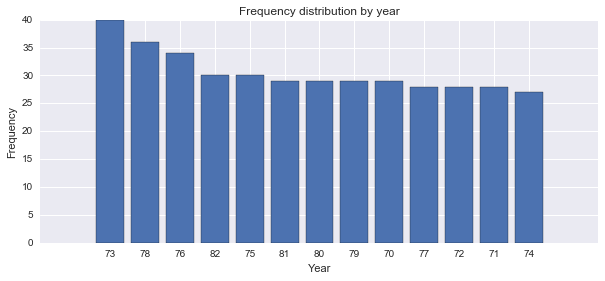

In [66]:
plt.figure(figsize = (10, 4))
plt.bar(range(len(counts)), counts, align = "center")
plt.xticks(range(len(counts)), counts.index)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Frequency distribution by year")

In [71]:
mpg_by_year = df.groupby("year")["mpg"].\
agg([np.median, np.std]).reset_index()

mpg_by_year

,year,median,std
0,70,16.00,5.339231
1,71,19.00,6.591942
2,72,18.50,5.435529
3,73,16.00,4.700245
4,74,24.00,6.420010
5,75,19.50,4.940566
6,76,21.00,5.889297
7,77,21.75,6.675862
8,78,20.70,6.898044
9,79,23.90,6.794217


In [79]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
271,23.2,4,156.0,105.0,2745.0,16.7,78,1,plymouth sapporo
148,26.0,4,116.0,75.00,2246.0,14.0,74,2,fiat 124 tc
180,25.0,4,121.0,115.0,2671.0,13.5,75,2,saab 99le
390,36.0,4,135.0,84.00,2370.0,13.0,82,1,dodge charger 2.2
326,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)
249,19.9,8,260.0,110.0,3365.0,15.5,78,1,oldsmobile cutlass salon brougham
72,15.0,8,304.0,150.0,3892.0,12.5,72,1,amc matador (sw)
275,17.0,6,163.0,125.0,3140.0,13.6,78,2,volvo 264gl
185,26.0,4,98.0,79.00,2255.0,17.7,76,1,dodge colt


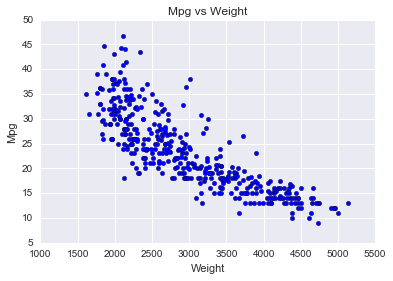

In [81]:
plt.scatter(df["weight"], df["mpg"])
plt.xlabel("Weight")
plt.ylabel("Mpg")
plt.title("Mpg vs Weight")

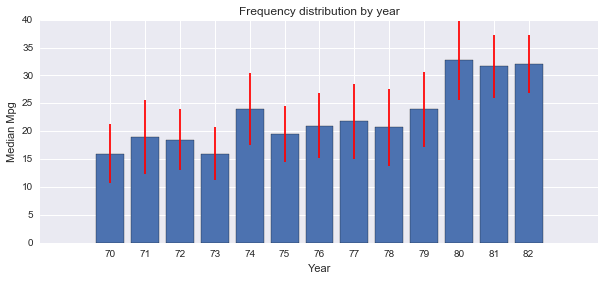

In [76]:
plt.figure(figsize = (10, 4))
plt.bar(range(mpg_by_year.shape[0]), mpg_by_year["median"],
        align = "center", yerr = mpg_by_year["std"], ecolor = "red")
plt.xticks(range(mpg_by_year.shape[0]), mpg_by_year["year"])
plt.xlabel("Year")
plt.ylabel("Median Mpg")
plt.title("Frequency distribution by year")

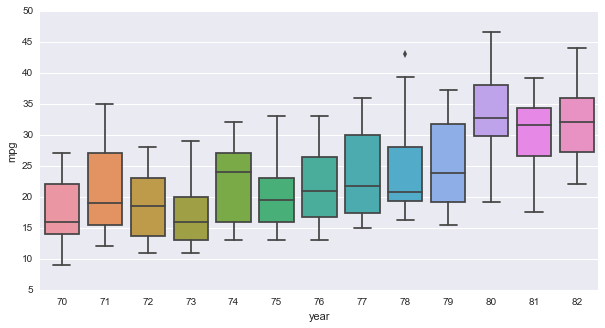

In [83]:
plt.figure(figsize=(10, 5))
sns.boxplot("year", "mpg", data = df)

In [84]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [90]:
aggr = df.groupby(["cylinders", "year"])["mpg"].\
agg([np.mean, np.std]).reset_index()

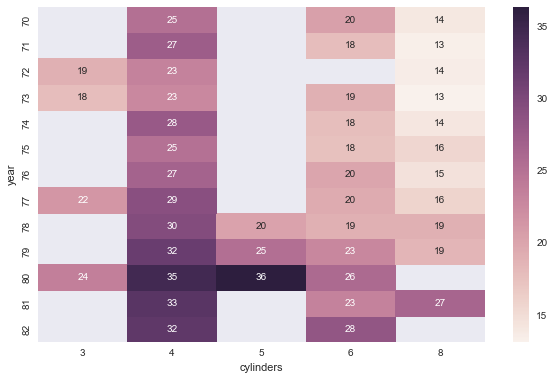

In [97]:
plt.figure(figsize = (10, 6))
sns.heatmap(aggr.pivot("year", "cylinders", "mean"), annot=True)

In [106]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
data = pd.read_csv(url, header=None, dtype=np.float64)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,1.0,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,1.0,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,1.0,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,1.0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,1.0,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [119]:
data.columns = [
    "Class",
"Alcohol",
"Malic acid",
"Ash",
"Alcalinity of ash",  
"Magnesium",
"Total phenols",
"Flavanoids",
"Nonflavanoid phenols",
"Proanthocyanins",
"Color intensity",
"Hue",
"OD280/OD315 of diluted wines",
"Proline"
]

In [114]:
data.corr()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


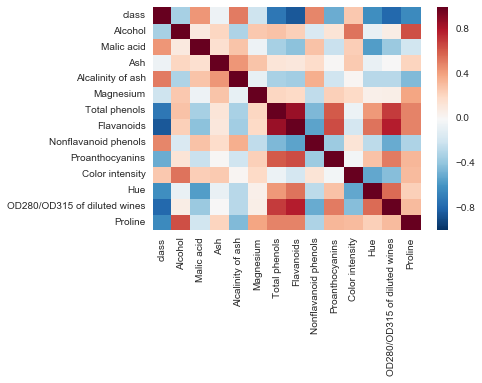

In [115]:
sns.heatmap(data.corr())

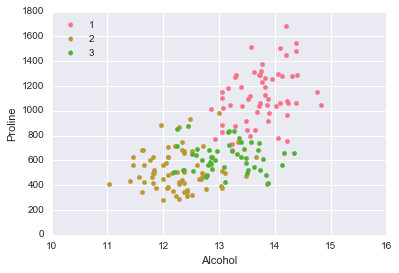

In [139]:
colors = sns.color_palette("husl")#["red", "blue", "green"]
markers = ["s", "o", "x"]
for i, cls in enumerate([1, 2, 3]):
    d1 = data[data.Class == cls]
    plt.scatter(d1["Alcohol"], d1["Proline"], 
                marker = "o", color = colors[i], label = cls)
    plt.xlabel("Alcohol")
    plt.ylabel("Proline")
plt.legend(loc = "upper left")

In [140]:
housing = pd.read_csv("../data/kaggle-house-prices/train.csv")

In [141]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [143]:
housing.select_dtypes(include=[np.float64, np.int64]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

# Exercise 2:

1. plot SalePrice 
2. show the median SalePrice against YrSold
3. inpute the NaN with median
4. plot heatmap of correlation among the numeric features

Hint: 
    housing.select_dtypes(include=[np.float64, np.int64]).info()